### **Import Required Libraries**

In [94]:
import pandas as pd # for data manipulation
import numpy as np # for numerical operations

import seaborn as sns  # for data visualization
import matplotlib.pyplot as plt # for plotting graphs

# sklearn imports
from sklearn.compose import ColumnTransformer # for transforming columns
from sklearn.impute import SimpleImputer # for handling missing values
from sklearn.linear_model import Lasso, LinearRegression, Ridge # for regression models
from sklearn.metrics import mean_squared_error, r2_score # for model evaluation
from sklearn.model_selection import train_test_split # for splitting data
from sklearn.pipeline import Pipeline # for creating machine learning pipelines
from sklearn.preprocessing import OneHotEncoder, StandardScaler # for data preprocessing
from sklearn.tree import DecisionTreeRegressor # for decision tree regression
from sklearn.metrics import classification_report # for classification report

### **Data Preparation and Preprocessing**

In [95]:
# Load the dataset
data=pd.read_csv("co2.csv")
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [96]:
# Check the structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

#### Handling Missing Values

In [97]:
# Check for missing values
data.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [98]:
# Rename 'Make' column to 'Brand'
data.rename(columns={'Make': 'Brand'}, inplace=True)
data.head()

,Brand,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Statistical Overview

In [99]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


### **Outlier Detection**

In [100]:
# Define numeric features
numeric_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                    'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
                    'Fuel Consumption Comb (mpg)']

C:\Users\ROG\AppData\Local\Temp\ipykernel_19392\3607575911.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[col] for col in numeric_features], labels=numeric_features)


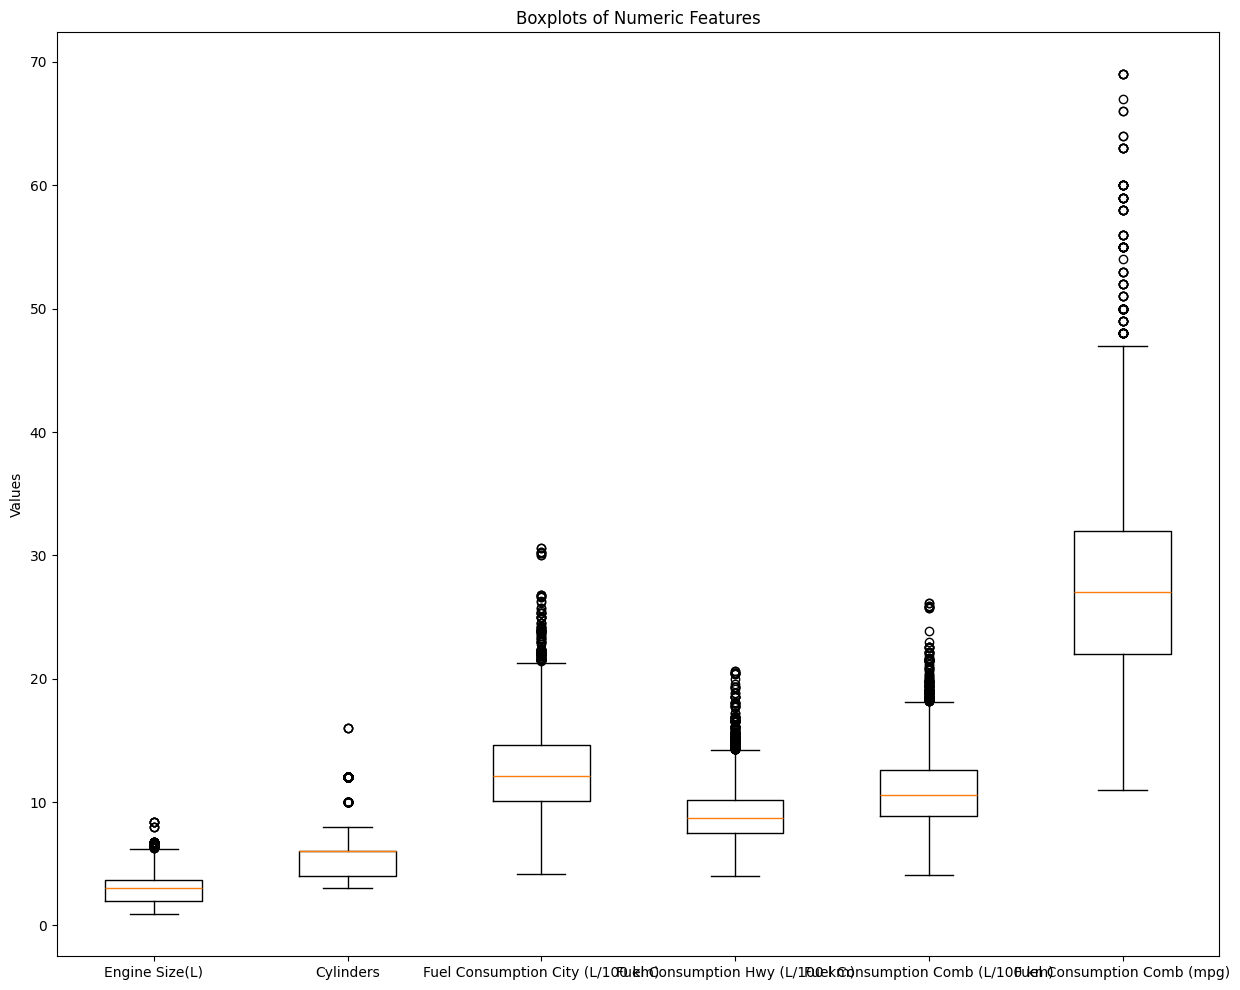

In [101]:
# Visualization of outliers using boxplots
plt.figure(figsize=(15, 12))
plt.boxplot([data[col] for col in numeric_features], labels=numeric_features)
plt.title("Boxplots of Numeric Features")
plt.ylabel("Values")
plt.show()

In [102]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

In [103]:
df = remove_outliers_iqr(data, numeric_features)
print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (6700, 12)


C:\Users\ROG\AppData\Local\Temp\ipykernel_19392\1565309872.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col] for col in numeric_features], labels=numeric_features)


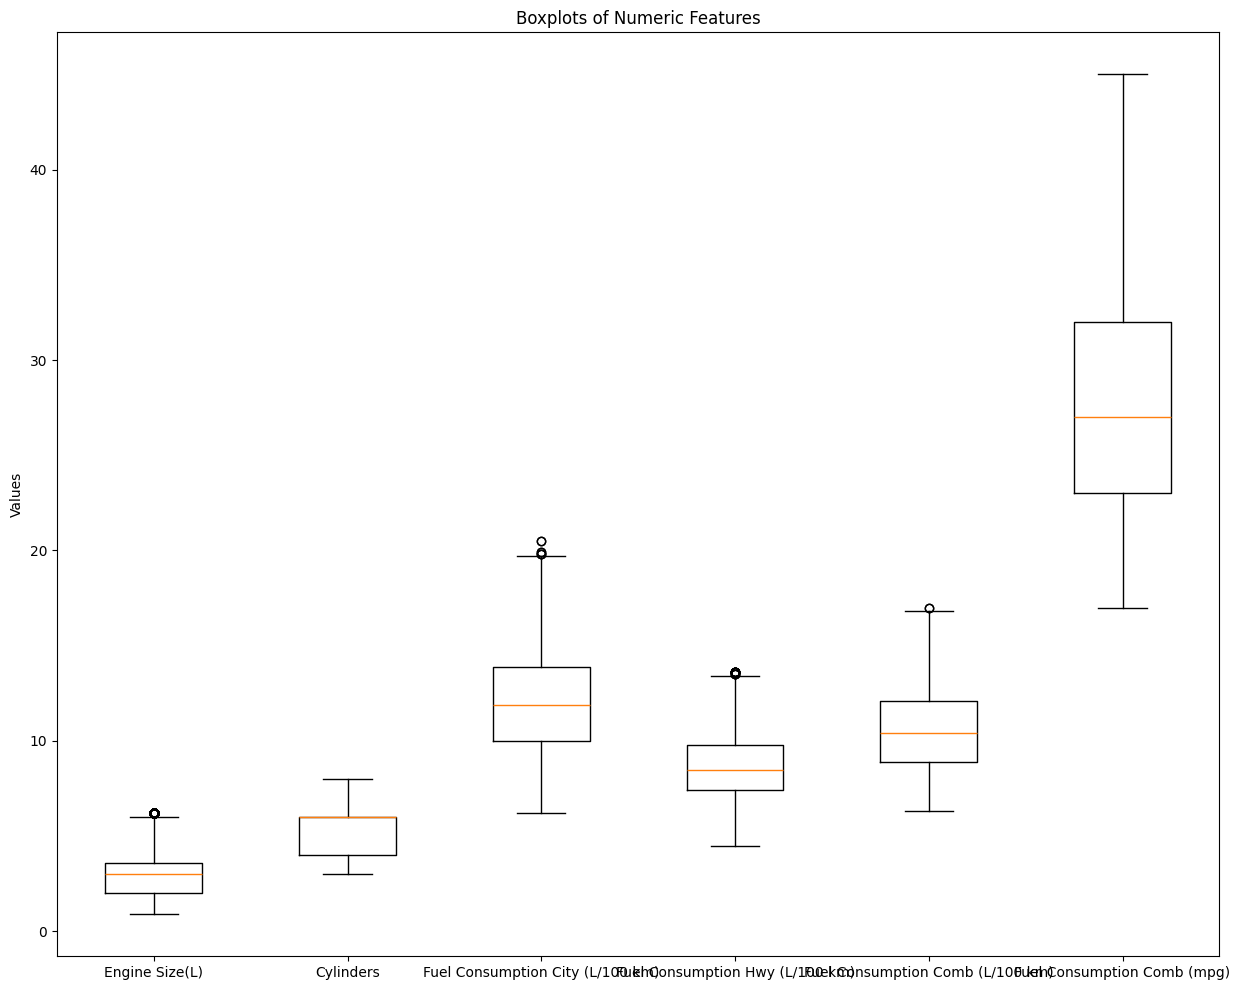

In [104]:
# Visualization of outliers using boxplots after outlier removal
plt.figure(figsize=(15, 12))
plt.boxplot([df[col] for col in numeric_features], labels=numeric_features)
plt.title("Boxplots of Numeric Features")
plt.ylabel("Values")
plt.show()

### **Visualization**

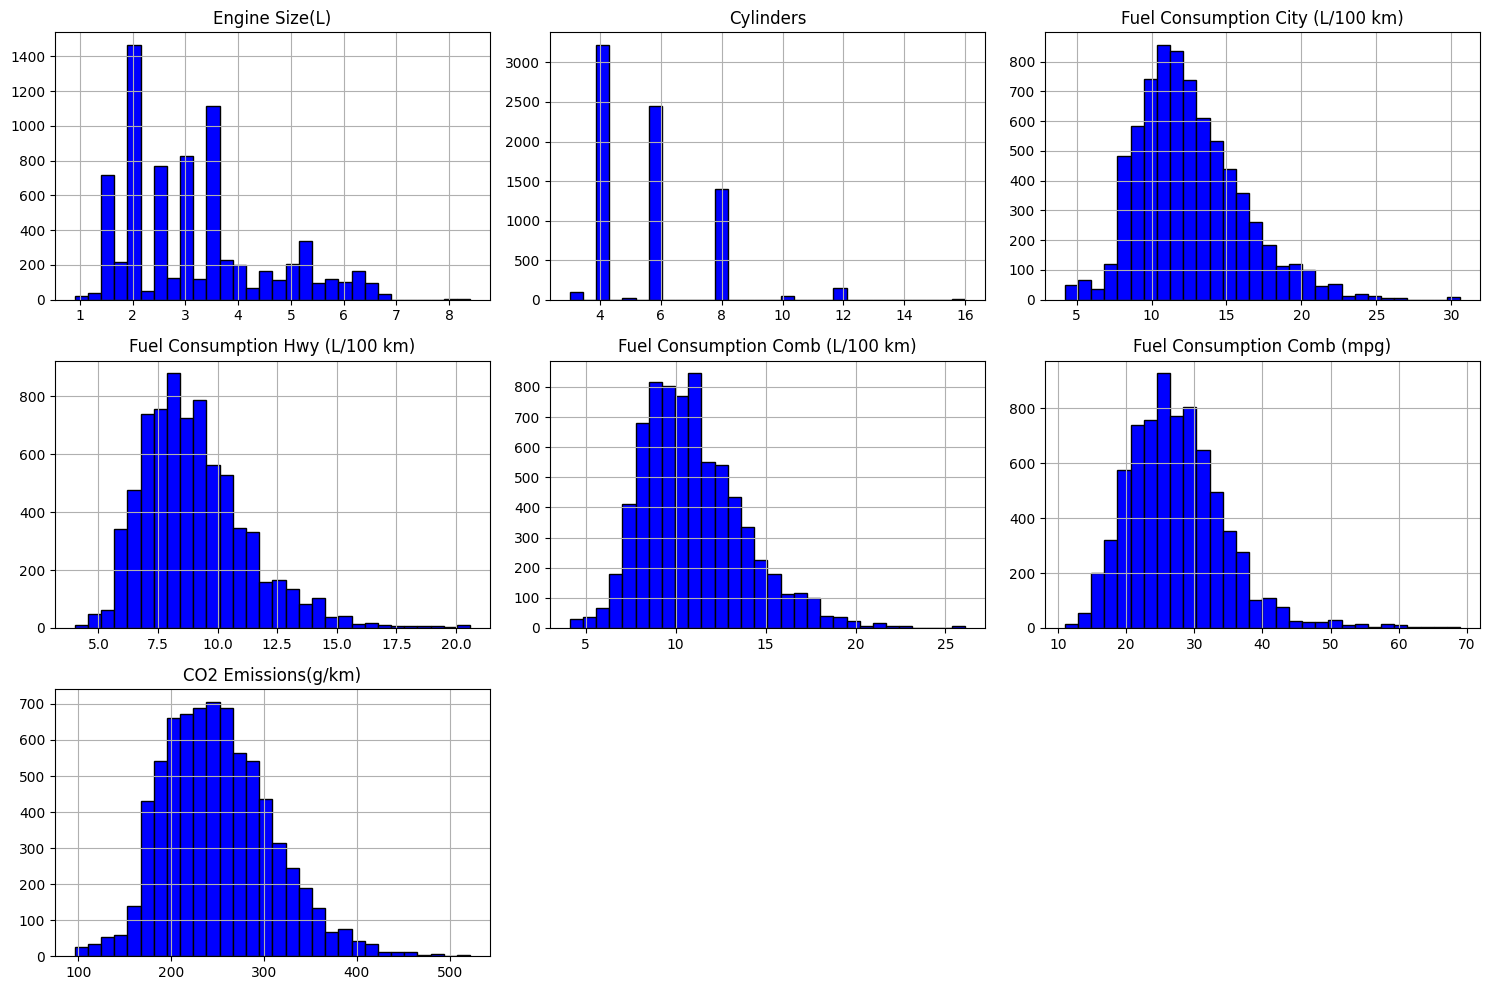

In [105]:
# Visualize the distribution of numerical features
data.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_19392\1380932113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Brand', data=data, order=data['Brand'].value_counts().index, palette='viridis')


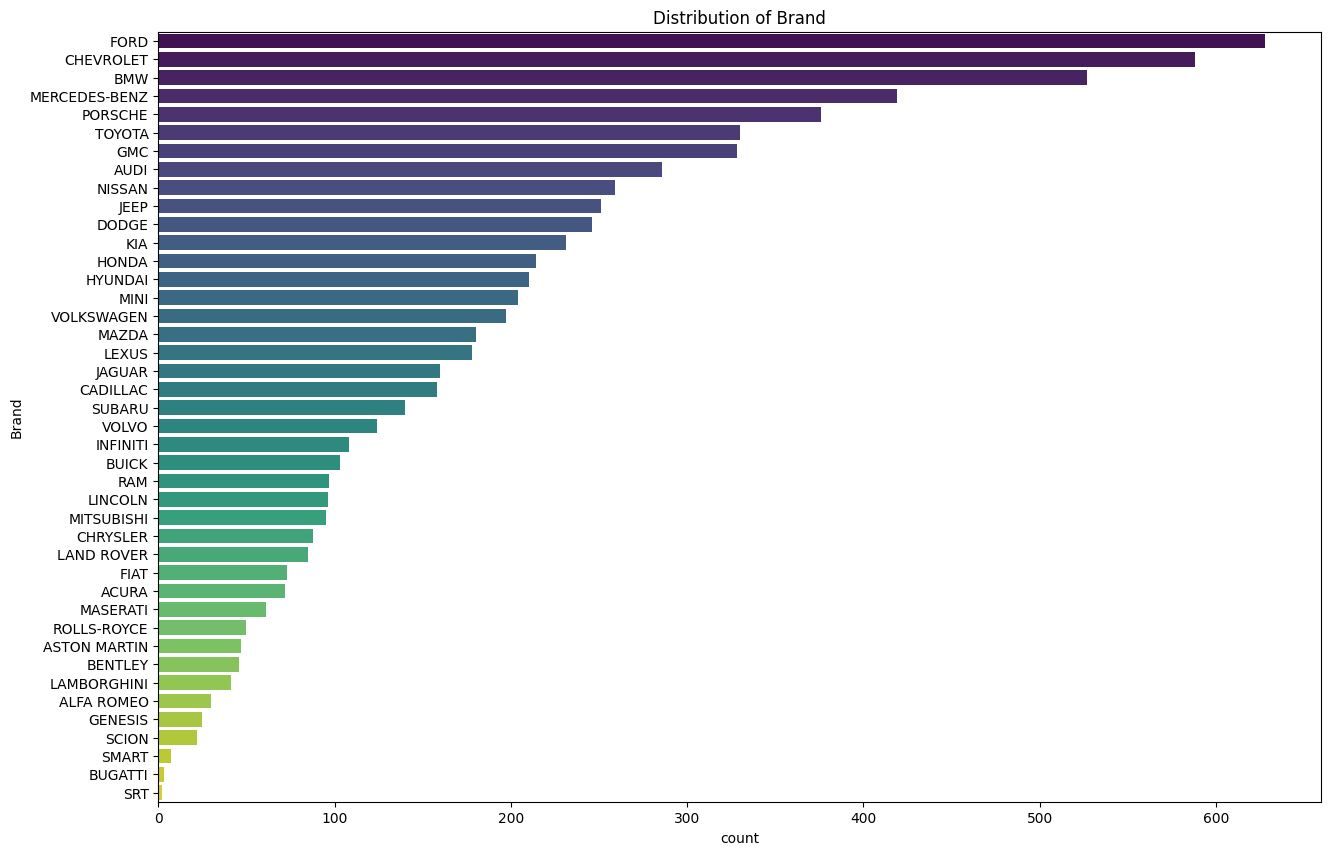

In [106]:
# Visualize the distribution of the target variable 'CO2 Emissions(g/km)'
plt.figure(figsize=(15, 10))
sns.countplot(y='Brand', data=data, order=data['Brand'].value_counts().index, palette='viridis')
plt.title('Distribution of Brand')
plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_19392\3073288031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Vehicle Class', data=data, order=data['Vehicle Class'].value_counts().index, palette='magma')


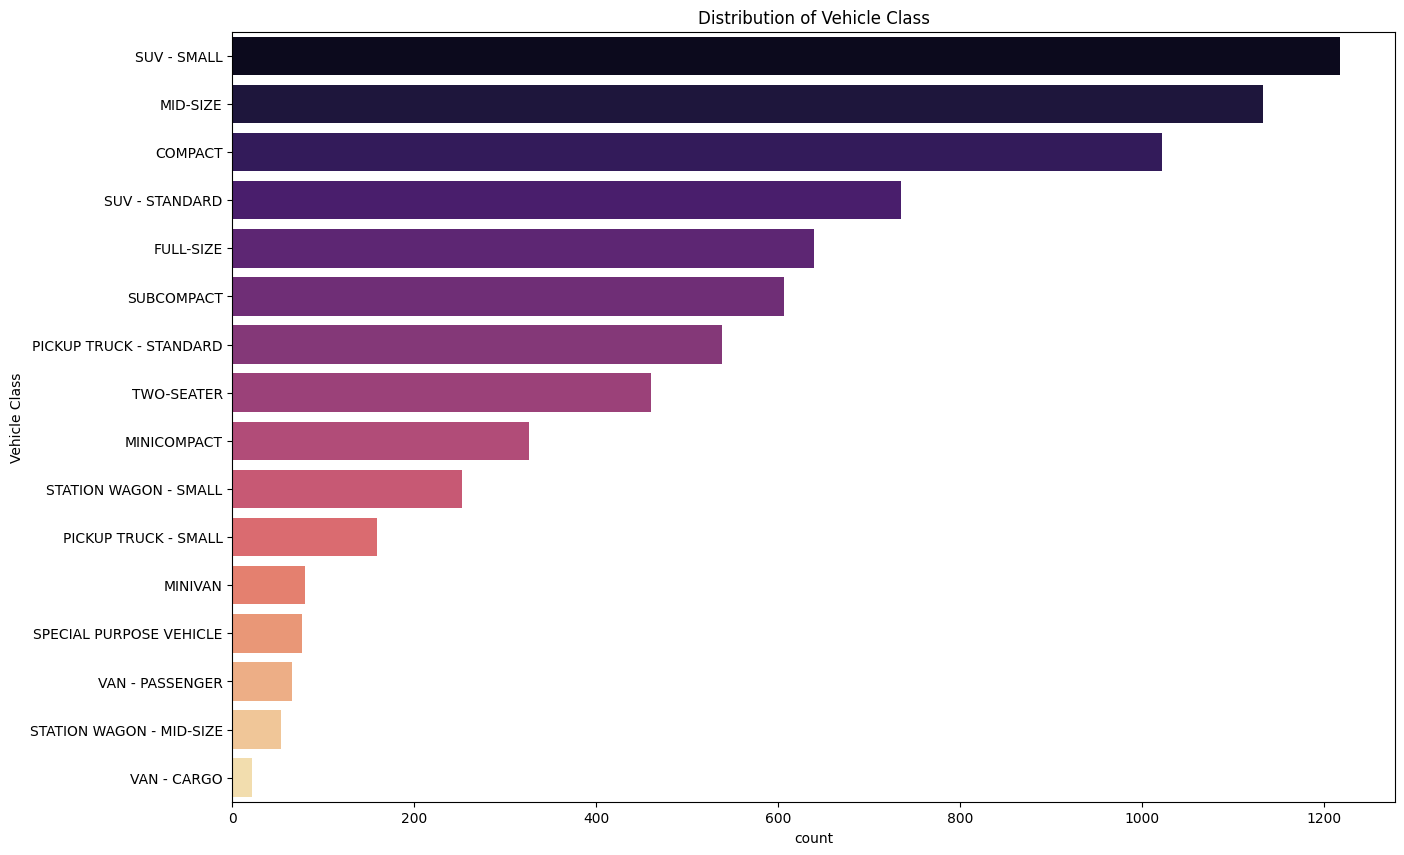

In [107]:
# Visualize the distribution of 'Vehicle Class'
plt.figure(figsize=(15, 10))
sns.countplot(y='Vehicle Class', data=data, order=data['Vehicle Class'].value_counts().index, palette='magma')
plt.title('Distribution of Vehicle Class')
plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_19392\1136862430.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Transmission', data=data, order=data['Transmission'].value_counts().index, palette='plasma')


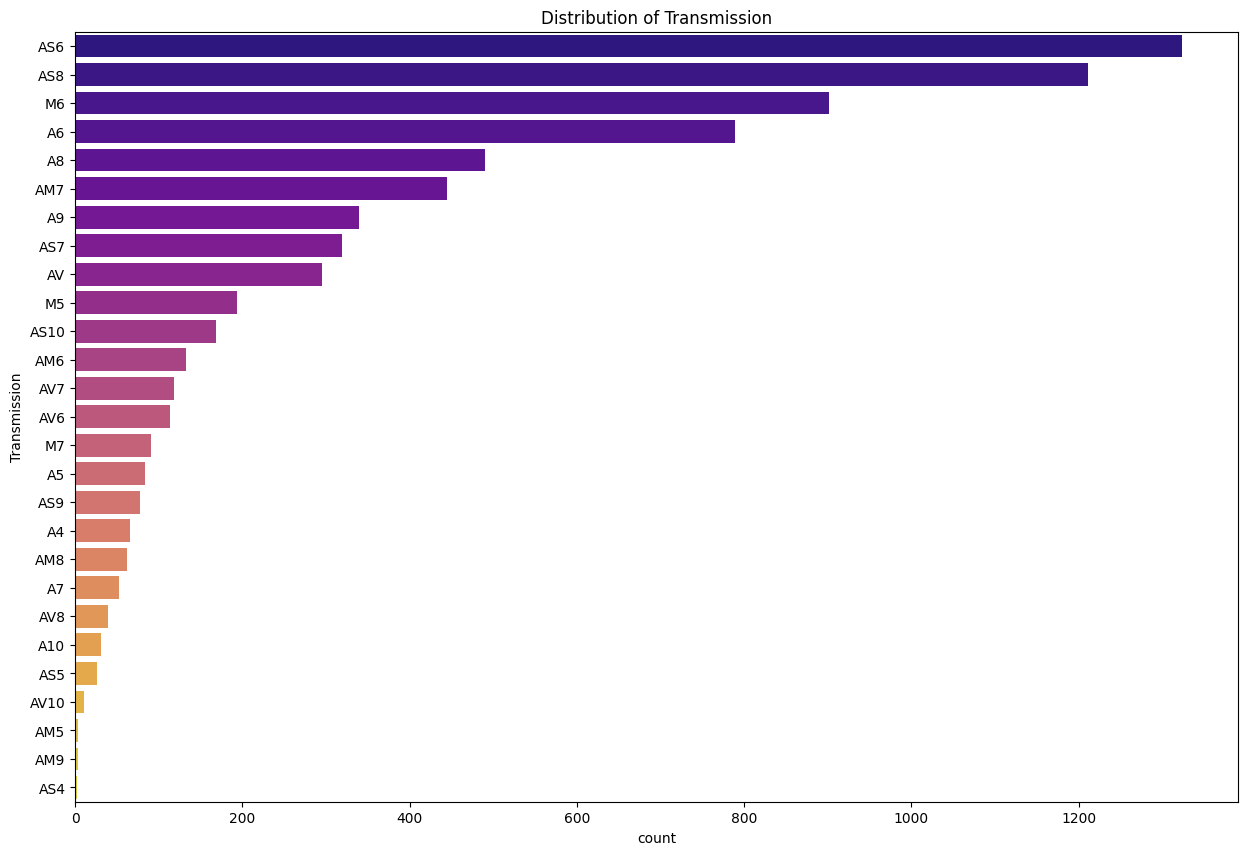

In [108]:
# Visualize the distribution of 'Transmission'
plt.figure(figsize=(15, 10))
sns.countplot(y='Transmission', data=data, order=data['Transmission'].value_counts().index, palette='plasma')
plt.title('Distribution of Transmission')
plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_19392\455465954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Fuel Type', data=data, order=data['Fuel Type'].value_counts().index, palette='cividis')


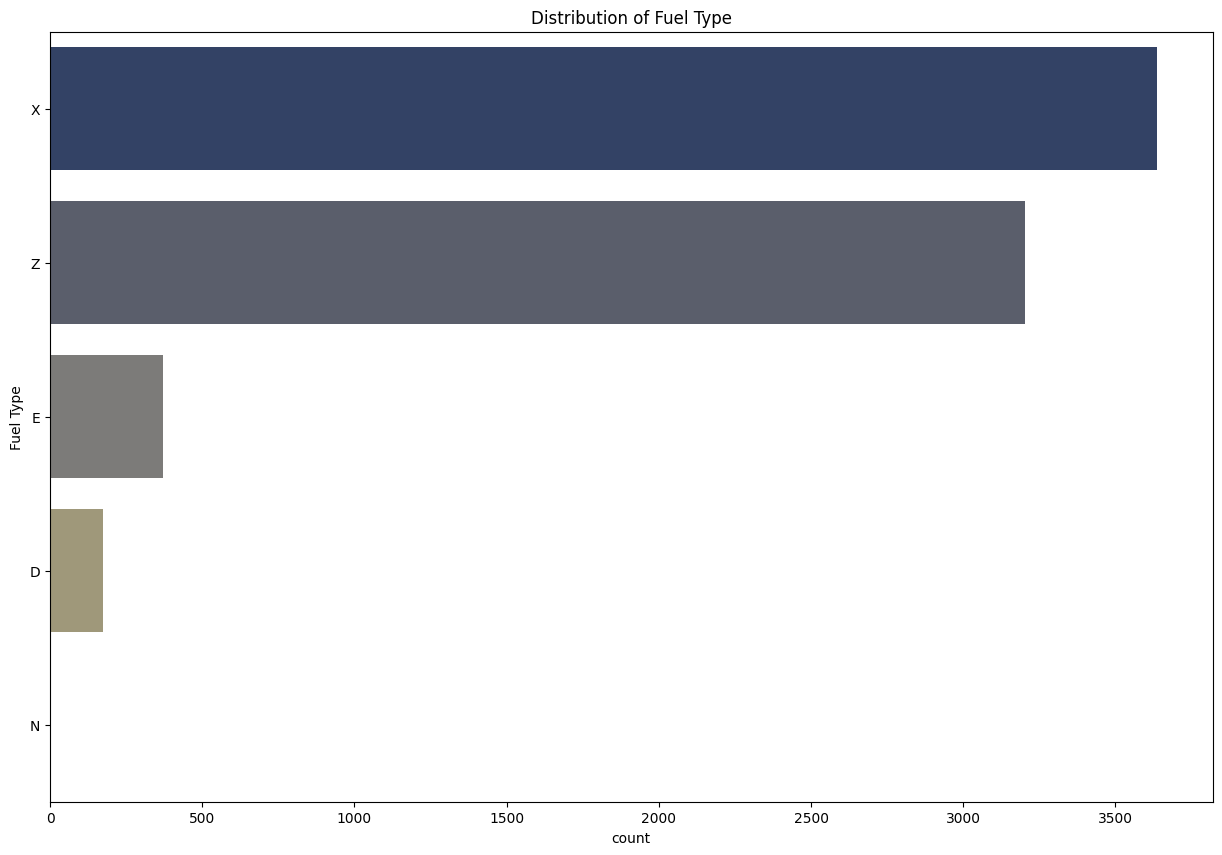

In [109]:
# Visualize the distribution of 'Fuel Type'
plt.figure(figsize=(15, 10))
sns.countplot(y='Fuel Type', data=data, order=data['Fuel Type'].value_counts().index, palette='cividis')
plt.title('Distribution of Fuel Type')
plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_19392\1256544109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='CO2 Emissions(g/km)', data=data, palette='Set3')


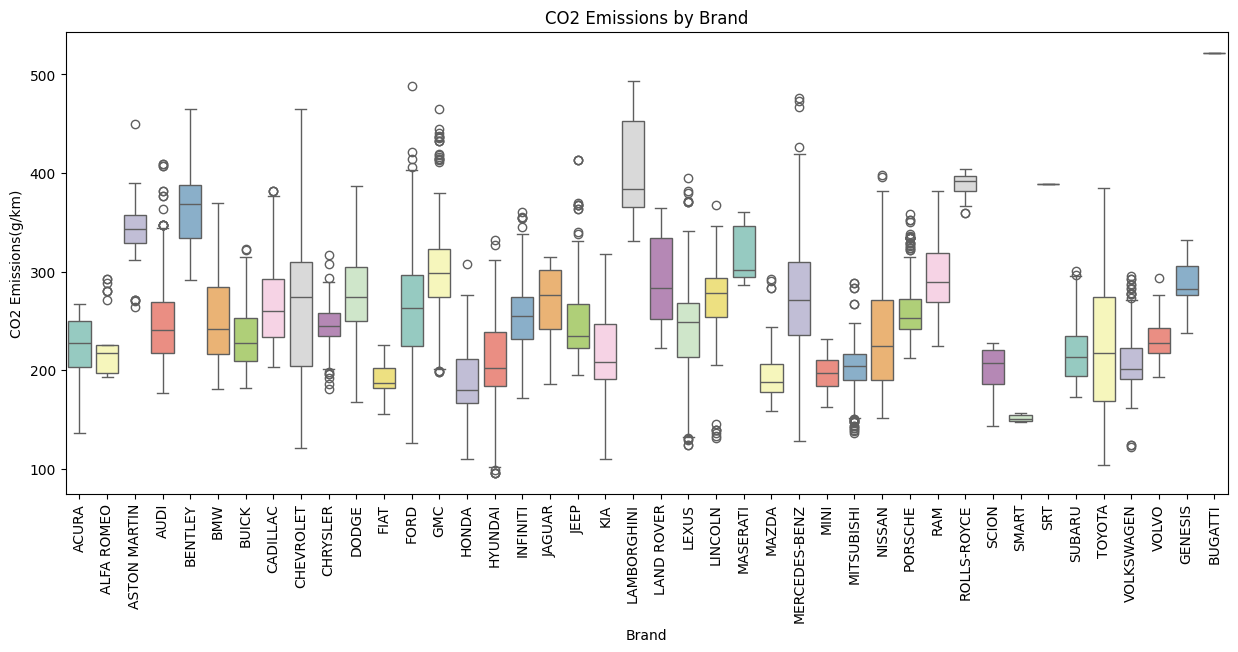

In [110]:
# Boxplot of CO2 Emissions by Brand
plt.figure(figsize=(15, 6))
sns.boxplot(x='Brand', y='CO2 Emissions(g/km)', data=data, palette='Set3')
plt.xticks(rotation=90)
plt.title('CO2 Emissions by Brand')
plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_19392\2698482763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=data, palette='Set2')


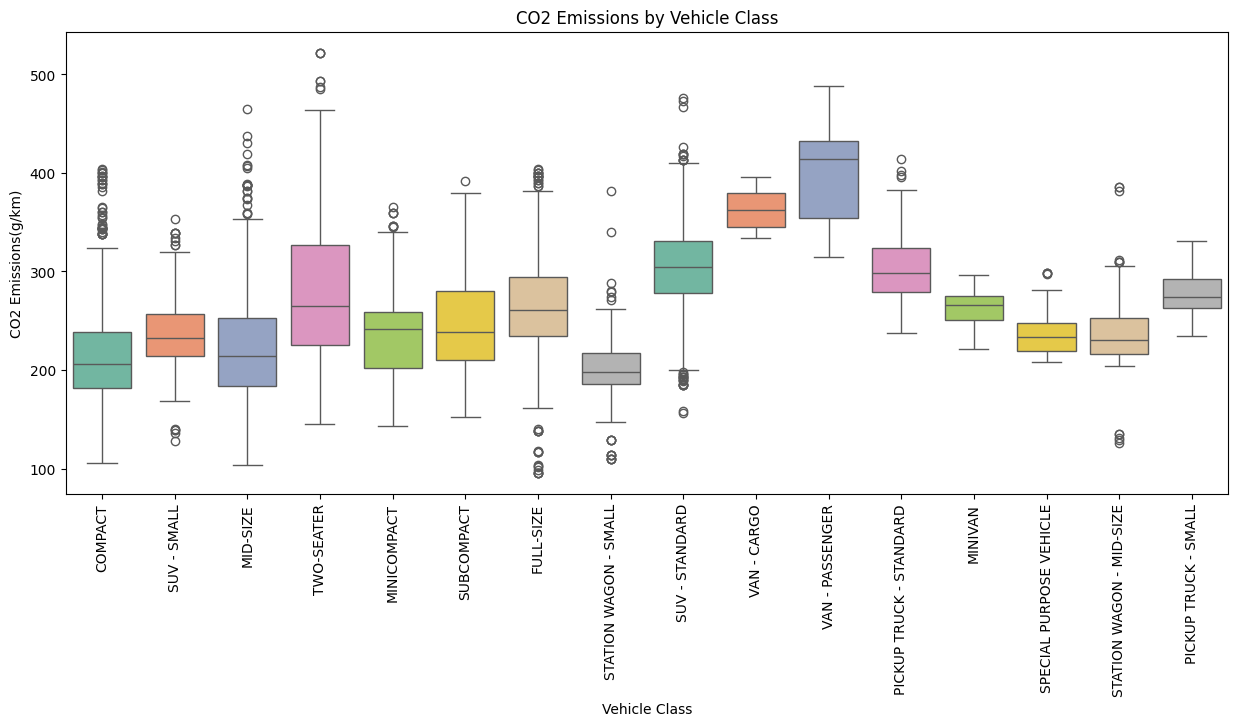

In [111]:
# Boxplot of CO2 Emissions by Vehicle Class
plt.figure(figsize=(15, 6))
sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=data, palette='Set2')
plt.xticks(rotation=90)
plt.title('CO2 Emissions by Vehicle Class')
plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_19392\1255077589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission', y='CO2 Emissions(g/km)', data=data, palette='Set1')


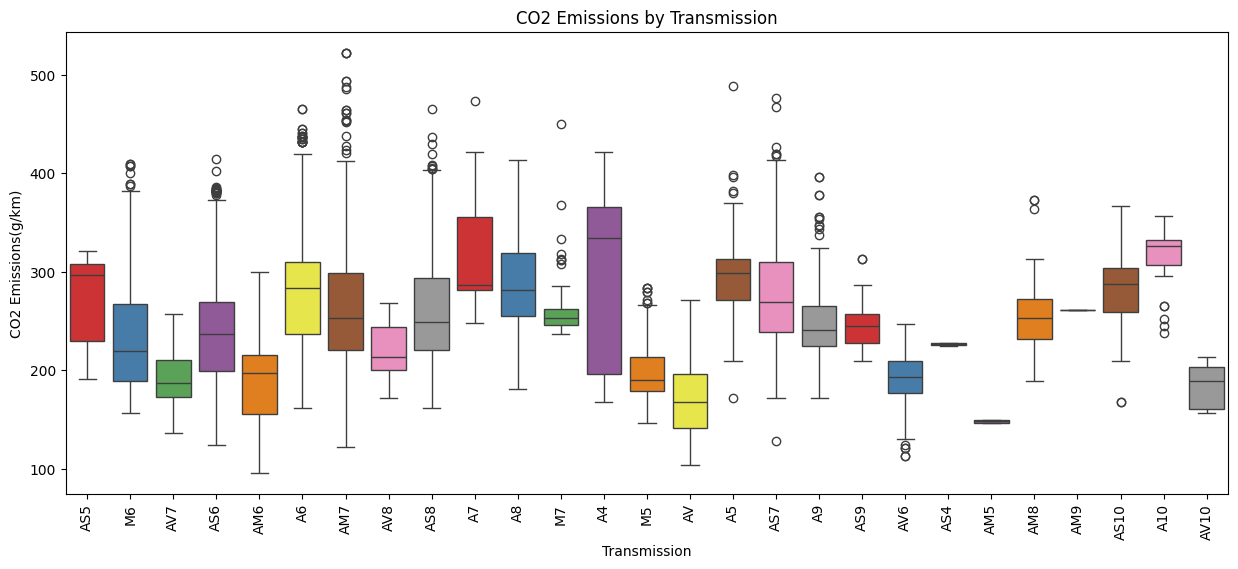

In [112]:
# Boxplot of CO2 Emissions by Transmission
plt.figure(figsize=(15, 6))
sns.boxplot(x='Transmission', y='CO2 Emissions(g/km)', data=data, palette='Set1')
plt.xticks(rotation=90)
plt.title('CO2 Emissions by Transmission')
plt.show()

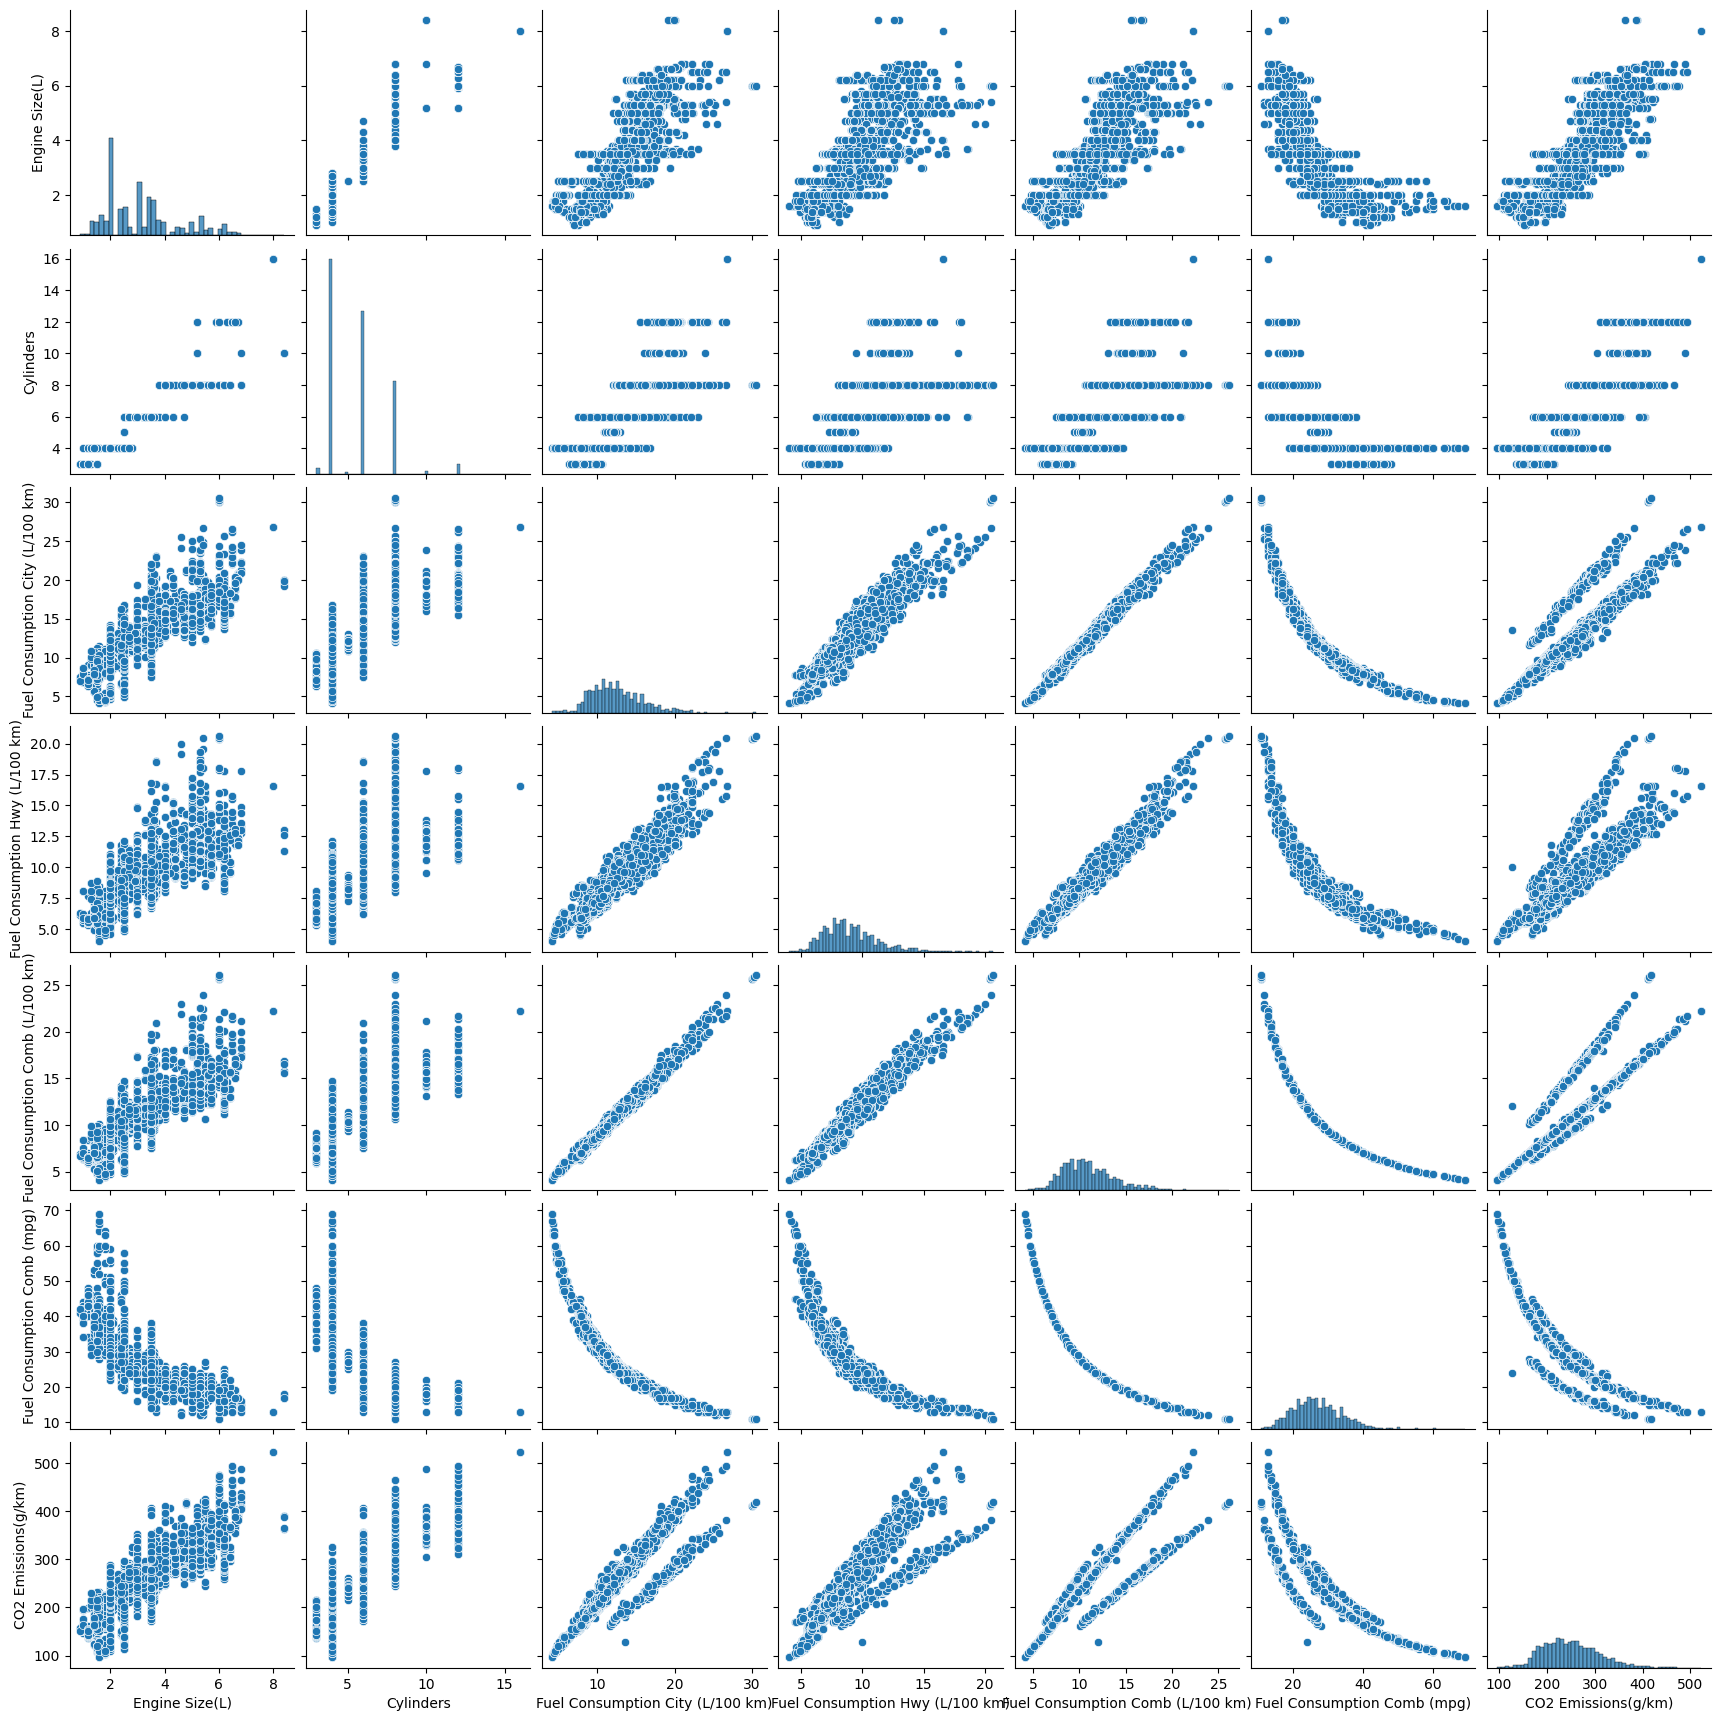

In [113]:
# Pairplot to see relationships between numerical features
sns.pairplot(data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
                 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']])
plt.show()

### **Feature Engineering**

In [114]:
# Prepare data for modeling
X = df.drop('CO2 Emissions(g/km)', axis=1)
y = df['CO2 Emissions(g/km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines for both numeric and categorical data


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define categorical features
categorical_features = ['Brand', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=float))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [115]:
results_df = pd.DataFrame(columns=["Model", "R2 Score Train","R2 Score Test", "MSE", "Accuracy"])

### **Build Models**

Linear Regression:
  MSE: 9.5135
  R2 Train: 0.9979
  R2 Test: 0.9960
------------------------------


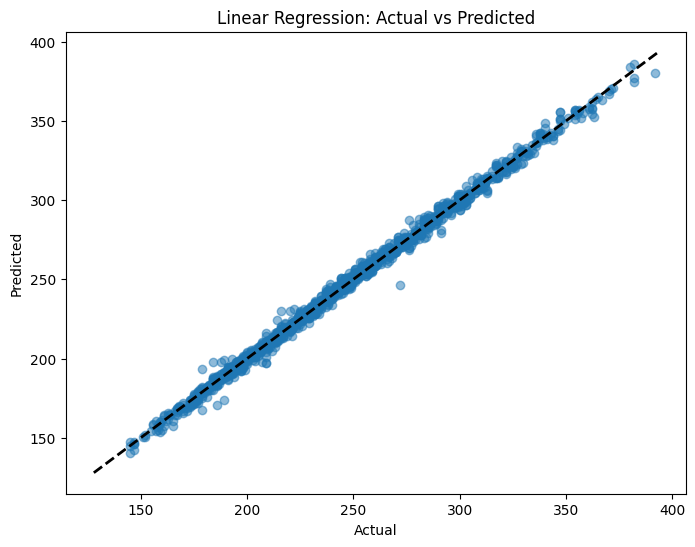

In [116]:
model = LinearRegression()

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)

accuracy = 1 - (mse / y_test.var())
results_df.loc[len(results_df)] = ["Linear Regression", r2_train,r2_test, mse, accuracy]

print("Linear Regression:")
print(f"  MSE: {mse:.4f}")
print(f"  R2 Train: {r2_train:.4f}")
print(f"  R2 Test: {r2_test:.4f}")
print("-" * 30)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


Ridge Regression:
  MSE: 8.2157
  R2 Train: 0.9976
  R2 Test: 0.9966
------------------------------


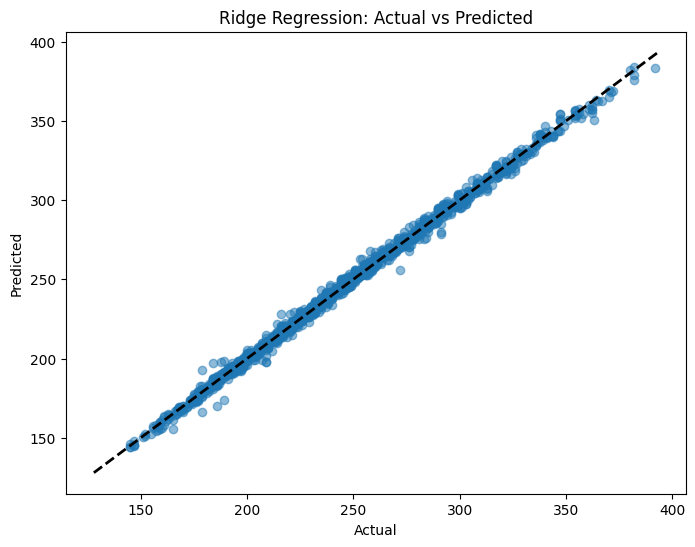

In [117]:
model = Ridge(alpha=1.0)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
accuracy = 1 - (mse / y_test.var())
results_df.loc[len(results_df)] = ["Ridge Regression", r2_train,r2_test, mse, accuracy]

print("Ridge Regression:")
print(f"  MSE: {mse:.4f}")
print(f"  R2 Train: {r2_train:.4f}")
print(f"  R2 Test: {r2_test:.4f}")
print("-" * 30)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')
plt.show()


Lasso Regression:
  MSE: 10.4366
  R2 Train: 0.9944
  R2 Test: 0.9956
------------------------------


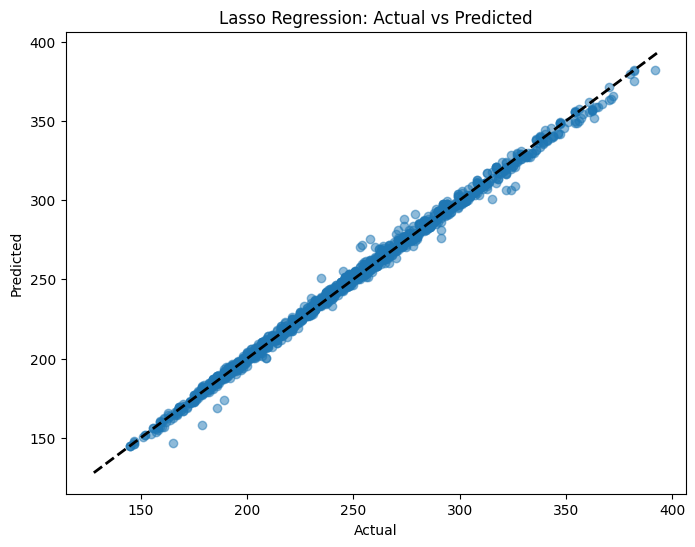

In [118]:
model = Lasso(alpha=0.1)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
accuracy = 1 - (mse / y_test.var())
results_df.loc[len(results_df)] = ["Lasso Regression", r2_train,r2_test, mse, accuracy]

print("Lasso Regression:")
print(f"  MSE: {mse:.4f}")
print(f"  R2 Train: {r2_train:.4f}")
print(f"  R2 Test: {r2_test:.4f}")
print("-" * 30)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted')
plt.show()


Decision Tree:
  MSE: 7.7069
  R2 Train: 0.9976
  R2 Test: 0.9968
------------------------------


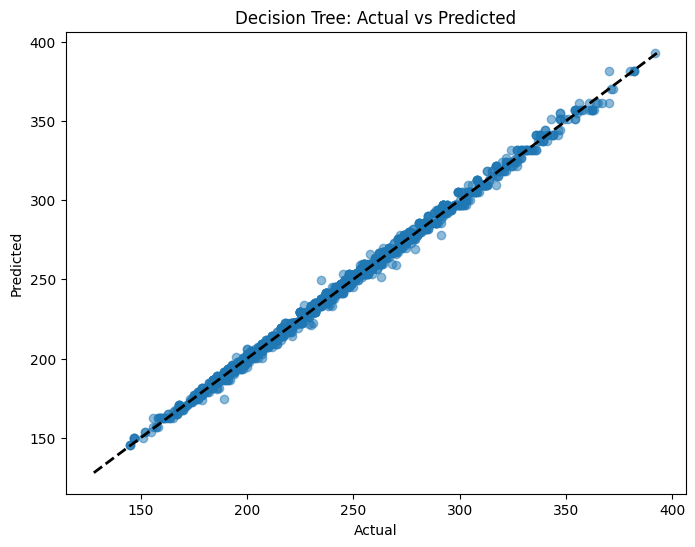

In [119]:
model = DecisionTreeRegressor(max_depth=8, random_state=42)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, clf.predict(X_train))
accuracy = 1 - (mse / y_test.var())
results_df.loc[len(results_df)] = ["Decision Tree Regression", r2_train,r2_test, mse, accuracy]


print("Decision Tree:")
print(f"  MSE: {mse:.4f}")
print(f"  R2 Train: {r2_train:.4f}")
print(f"  R2 Test: {r2_test:.4f}")
print("-" * 30)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree: Actual vs Predicted')
plt.show()


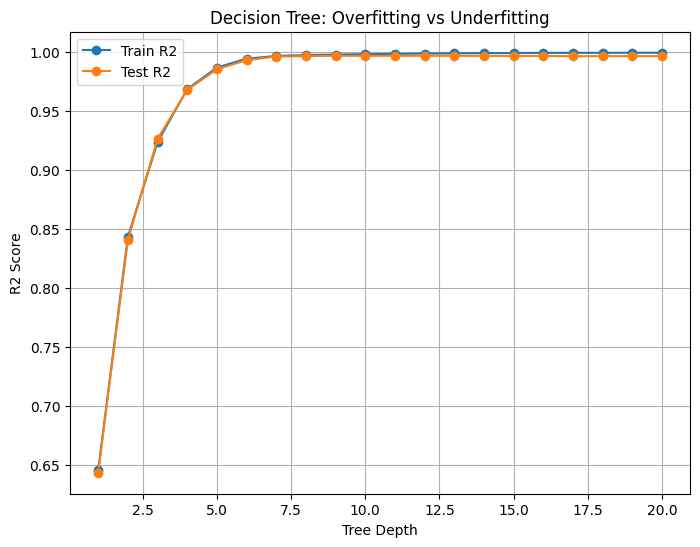

In [120]:
train_scores = []
test_scores = []
depths = range(1, 21)

for d in depths:
    dt = DecisionTreeRegressor(max_depth=d, random_state=42)

    # Fit model INSIDE the pipeline (to ensure encoding + scaling)
    dt_clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', dt)
    ])

    dt_clf.fit(X_train, y_train)

    train_scores.append(r2_score(y_train, dt_clf.predict(X_train)))
    test_scores.append(r2_score(y_test, dt_clf.predict(X_test)))

# Plot depth vs R²
plt.figure(figsize=(8, 6))
plt.plot(depths, train_scores, marker='o', label="Train R2")
plt.plot(depths, test_scores, marker='o', label="Test R2")
plt.xlabel("Tree Depth")
plt.ylabel("R2 Score")
plt.title("Decision Tree: Overfitting vs Underfitting")
plt.legend()
plt.grid(True)
plt.show()

In [121]:
results_df.sort_values(by='R2 Score Test', ascending=False, inplace=True)
results_df

,Model,R2 Score Train,R2 Score Test,MSE,Accuracy
3,Decision Tree Regression,0.997623,0.996781,7.706914,0.996784
1,Ridge Regression,0.997620,0.996569,8.215731,0.996571
0,Linear Regression,0.997880,0.996027,9.513490,0.996030
2,Lasso Regression,0.994368,0.995641,10.436573,0.995645


In [122]:
best_model_name = results_df.sort_values("R2 Score Test", ascending=False).iloc[0]["Model"]
print("Best Model:", best_model_name)

Best Model: Decision Tree Regression


In [123]:
best_model = clf.named_steps["model"]
feature_names = clf.named_steps["preprocessor"].get_feature_names_out()

importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

importance_df


,Feature,Importance
4,num__Fuel Consumption Comb (L/100 km),0.932128
1854,cat__Fuel Type_E,0.051922
1853,cat__Fuel Type_D,0.011036
5,num__Fuel Consumption Comb (mpg),0.003430
1855,cat__Fuel Type_N,0.000585
...,...,...
1837,cat__Transmission_AM9,0.000000
1838,cat__Transmission_AS10,0.000000
1839,cat__Transmission_AS4,0.000000
1840,cat__Transmission_AS5,0.000000


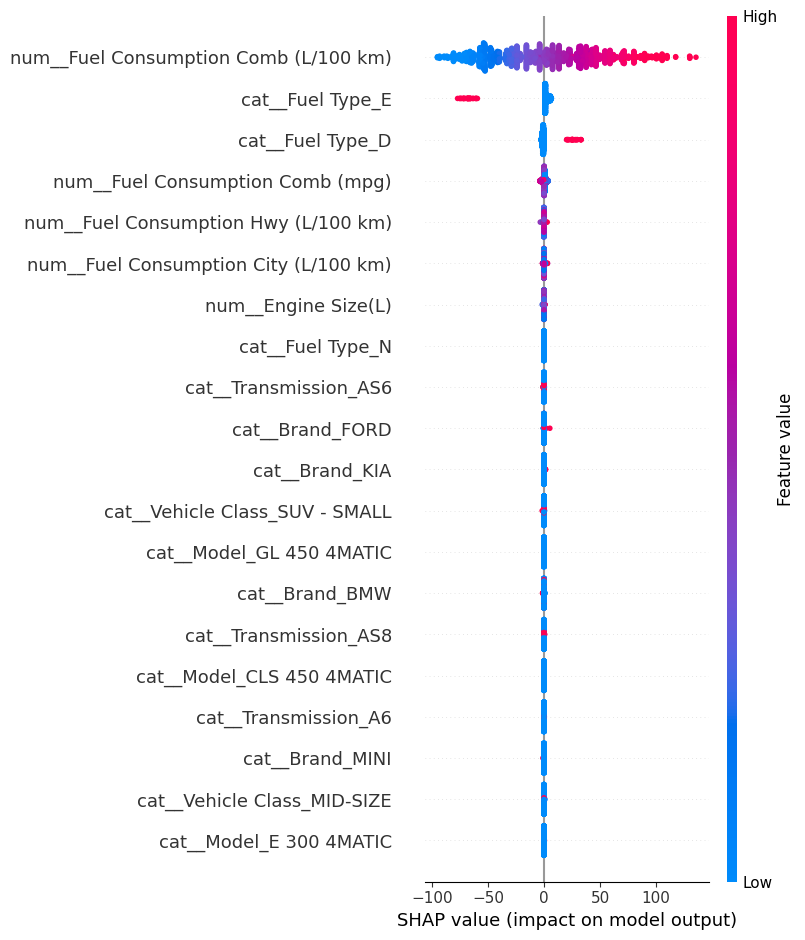

In [124]:
import shap
explainer = shap.TreeExplainer(best_model)

X_test_trans = clf.named_steps["preprocessor"].transform(X_test)
X_test_trans = X_test_trans.astype(float)
shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(shap_values, X_test_trans, feature_names=feature_names)


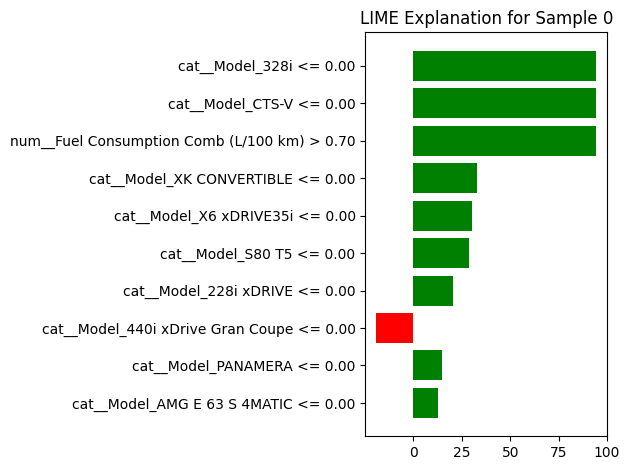

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
from IPython.display import display

X_train_trans = clf.named_steps["preprocessor"].transform(X_train)
X_test_trans = clf.named_steps["preprocessor"].transform(X_test)

explainer = LimeTabularExplainer(
    training_data=np.array(X_train_trans),
    feature_names=feature_names,
    mode="regression"
)

i = 0
exp = explainer.explain_instance(
    X_test_trans[i],
    best_model.predict,
    num_features=10
)

exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Sample {i}")
plt.tight_layout()
plt.show()